# Solar panel Regression

Introduction: In this project, we apply regression analysis — a fundamental technique in data science — to model and predict solar panel energy generation. By analyzing historical data on solar irradiance, weather conditions, and panel specifications, we aim to uncover patterns and quantify the impact of each factor on energy output.

# Step 1:- Problem Definition

Objective: The variable to be predicted is continuous (energy production). Therefore, this is an Regression project. The primary goal is to model energy production as a function of environmental variables

Data Set Description :- Independent variable(x): distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period) Dependent variable(y): power-generated

# Step 2:- Data Collection

In [1]:
# Loading the dataset using pandas library to do further processing on it
import pandas as pd
import numpy as np
df=pd.read_csv("solarpowergeneration.csv")
df

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0        75                          8.0   
1             0        10.0        77                          5.0   
2             0        10.0        70                          0.0   
3             0        10.0        33                          0.0   
4             0        10.0        21                          3.0   
...         ...         ...       ...                          ...   
2915          4        10.0        75                         10.0   
2916          1        10.0        66                         15.0   
2917          2        10.0        68                         21.0   
2918          2        10.0        81                         17.0   
2919          1        10.0        81                         11.0   

      average-pressure-(period)  power-generated  
0                         29.82                0  
1                         29.85                0  
2                         29.89             5418  
3                         29.91            25477  
4                         29.89            30069  
...                         ...              ...  
2915                      29.93             6995  
2916                      29.91            29490  
2917                      29.88            17257  
2918                      29.87              677  
2919                      29.90                0  

[2920 rows x 10 columns]

# Step 3:- Data Preprocessing

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [3]:
df.describe

<bound method NDFrame.describe of       distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0    

In [4]:
df.head(10)

distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                0.859897           69              28         7.5          0   
1                0.628535           69              28         7.5          0   
2                0.397172           69              28         7.5          0   
3                0.165810           69              28         7.5          0   
4                0.065553           69              28         7.5          0   
5                0.296915           69              28         7.5          0   
6                0.528278           69              28         7.5          0   
7                0.759640           69              28         7.5          0   
8                0.862113           72              29         6.8          0   
9                0.630155           72              29         6.8          0   

   visibility  humidity  average-wind-speed-(period)  \
0        10.0        75                          8.0   
1        10.0        77                          5.0   
2        10.0        70                          0.0   
3        10.0        33                          0.0   
4        10.0        21                          3.0   
5        10.0        20                         23.0   
6        10.0        36                         15.0   
7        10.0        49                          6.0   
8        10.0        67                          6.0   
9        10.0        49                          0.0   

   average-pressure-(period)  power-generated  
0                      29.82                0  
1                      29.85                0  
2                      29.89             5418  
3                      29.91            25477  
4                      29.89            30069  
5                      29.85            16280  
6                      29.83              515  
7                      29.86                0  
8                      29.86                0  
9                      29.87                0

In [5]:
df.tail(10)

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
2910                0.523627           61              27        15.8   
2911                0.753512           61              27        15.8   
2912                0.857875           63              27        13.9   
2913                0.627401           63              27        13.9   
2914                0.396927           63              27        13.9   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
2910          3        10.0        84                         17.0   
2911          4        10.0        90                         13.0   
2912          4        10.0        93                         11.0   
2913          4        10.0        90                         11.0   
2914          4        10.0        87                          9.0   
2915          4        10.0        75                         10.0   
2916          1        10.0        66                         15.0   
2917          2        10.0        68                         21.0   
2918          2        10.0        81                         17.0   
2919          1        10.0        81                         11.0   

      average-pressure-(period)  power-generated  
2910                      29.85              895  
2911                      29.87                0  
2912                      29.86                0  
2913                      29.86                0  
2914                      29.90              464  
2915                      29.93             6995  
2916                      29.91            29490  
2917                      29.88            17257  
2918                      29.87              677  
2919                      29.90                0

In [6]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [7]:
df.shape

(2920, 10)

In [8]:
df.isnull()

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                      False        False           False       False   
1                      False        False           False       False   
2                      False        False           False       False   
3                      False        False           False       False   
4                      False        False           False       False   
...                      ...          ...             ...         ...   
2915                   False        False           False       False   
2916                   False        False           False       False   
2917                   False        False           False       False   
2918                   False        False           False       False   
2919                   False        False           False       False   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0         False       False     False                        False   
1         False       False     False                        False   
2         False       False     False                        False   
3         False       False     False                        False   
4         False       False     False                        False   
...         ...         ...       ...                          ...   
2915      False       False     False                        False   
2916      False       False     False                        False   
2917      False       False     False                        False   
2918      False       False     False                        False   
2919      False       False     False                        False   

      average-pressure-(period)  power-generated  
0                         False            False  
1                         False            False  
2                         False            False  
3                         False            False  
4                         False            False  
...                         ...              ...  
2915                      False            False  
2916                      False            False  
2917                      False            False  
2918                      False            False  
2919                      False            False  

[2920 rows x 10 columns]

In [9]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [10]:
df['average-wind-speed-(period)'] = df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].mean())

In [11]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

# Step 4:Data Visulization 



using various graphs i.e. Histogarm,Boxplot,Pairplot,Heatmap,Scatterplot,KDE plot


In [12]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

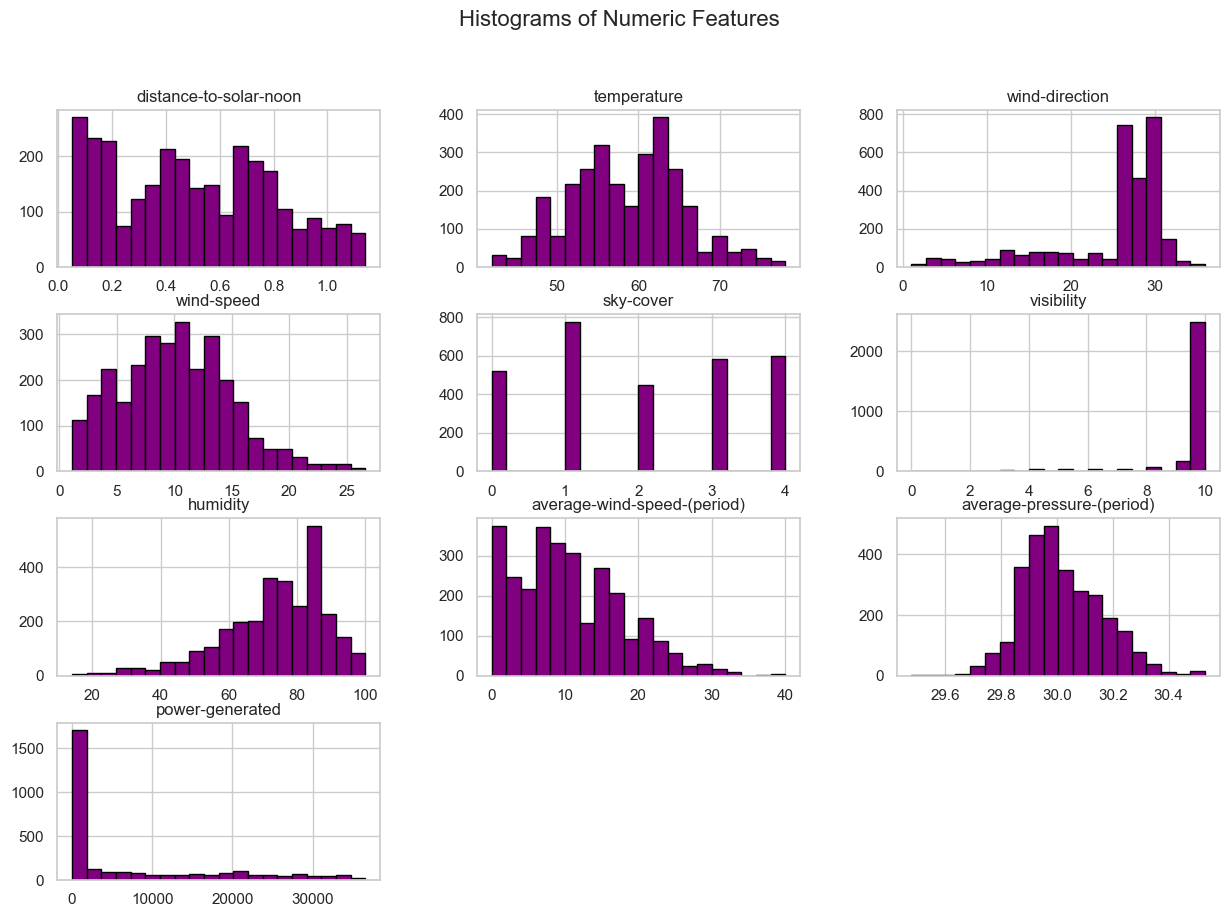

In [13]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

# 1️. Histogram for each numeric column
df.hist(bins=20, figsize=(15, 10), color='purple', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

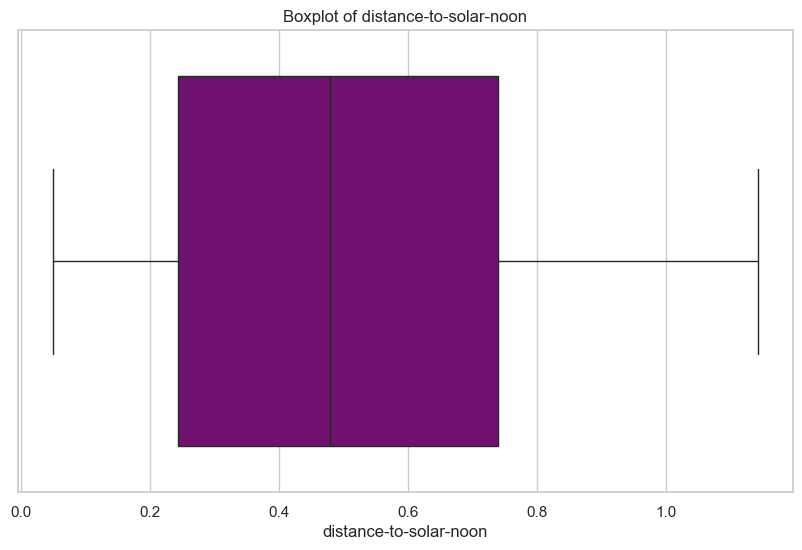

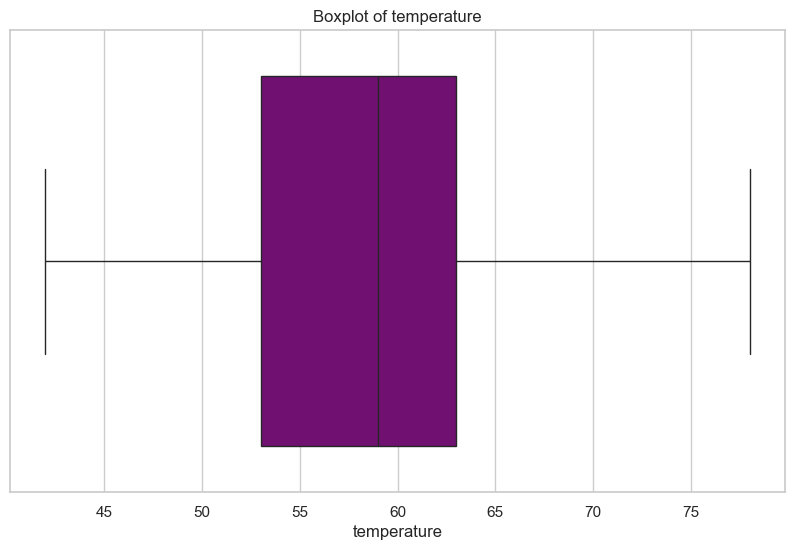

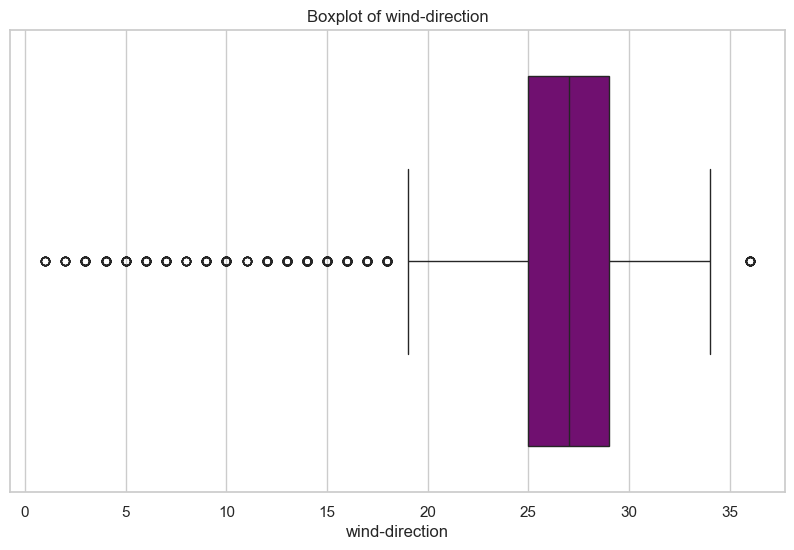

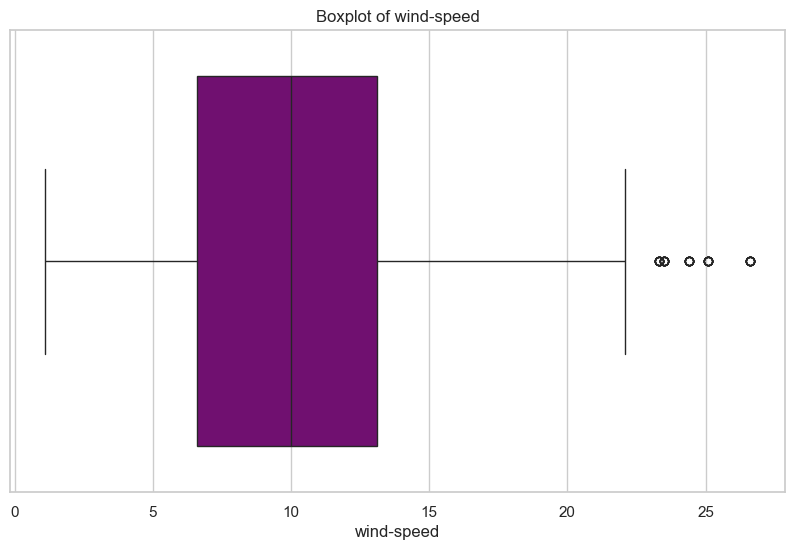

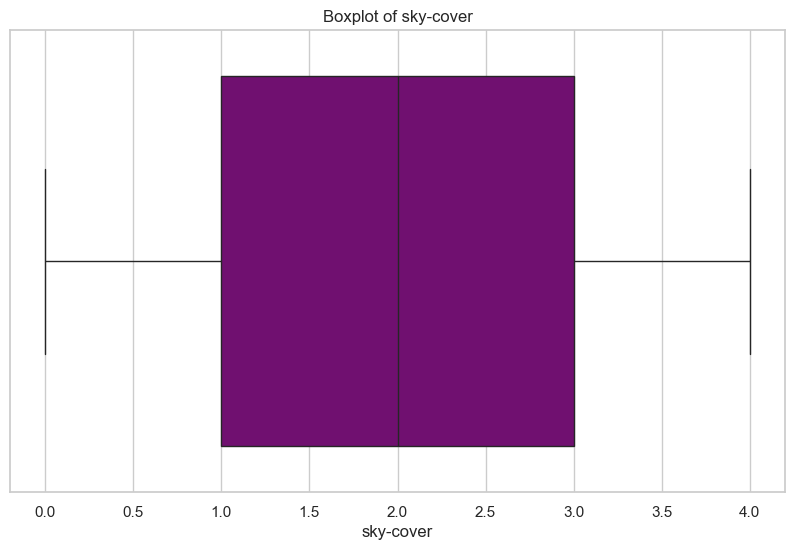

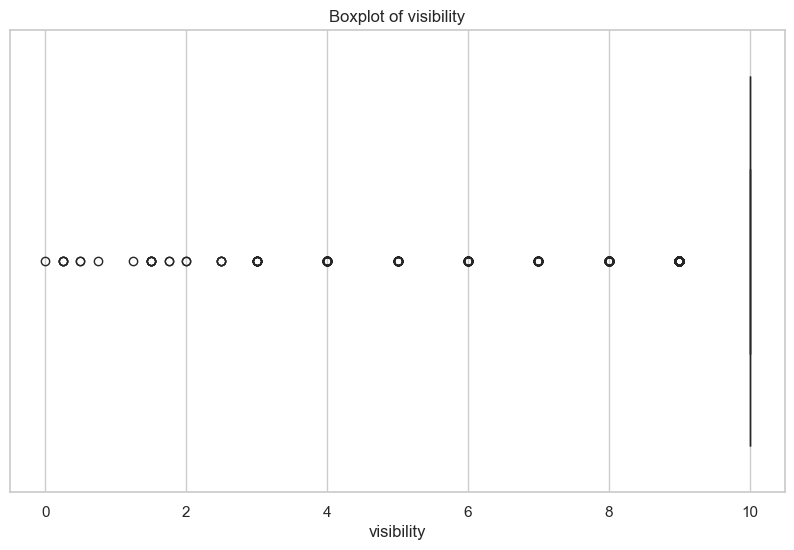

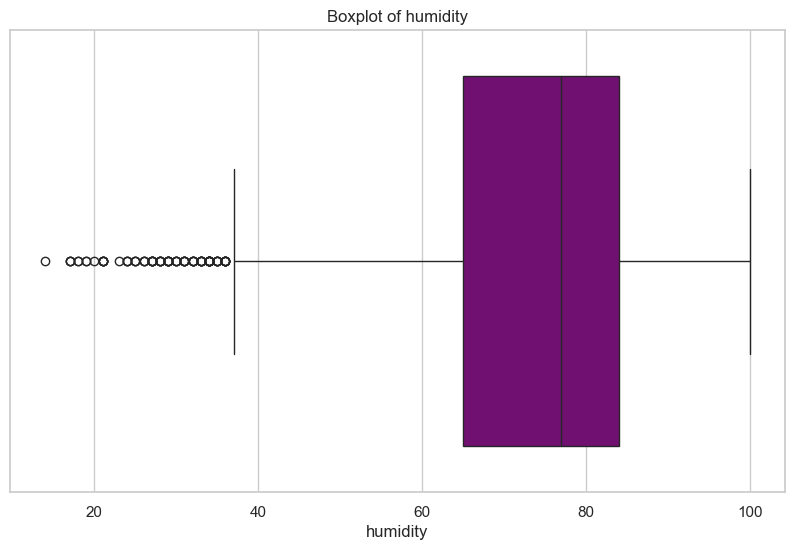

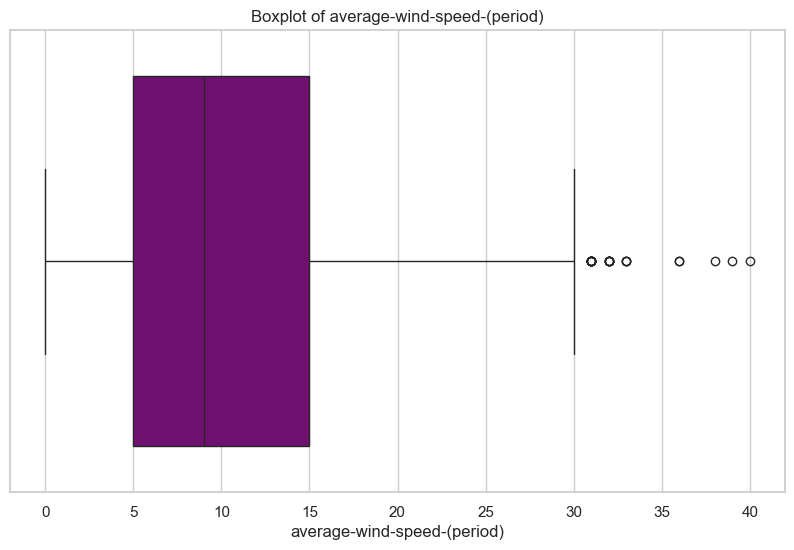

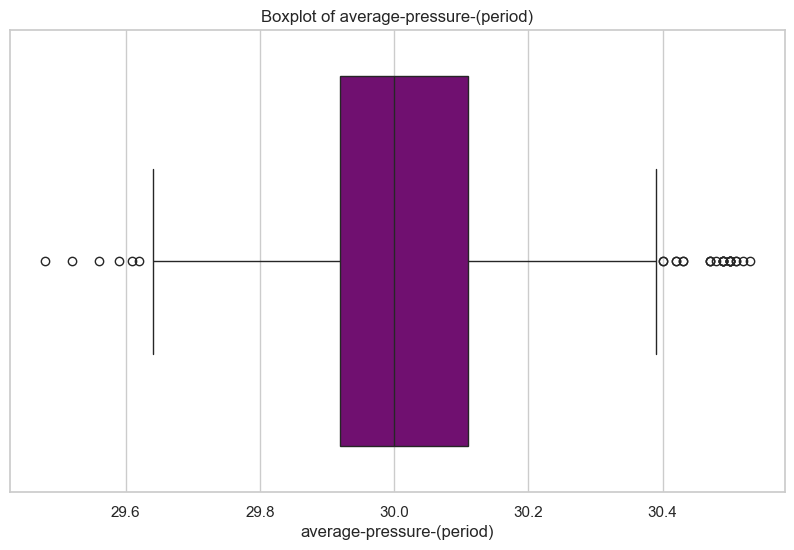

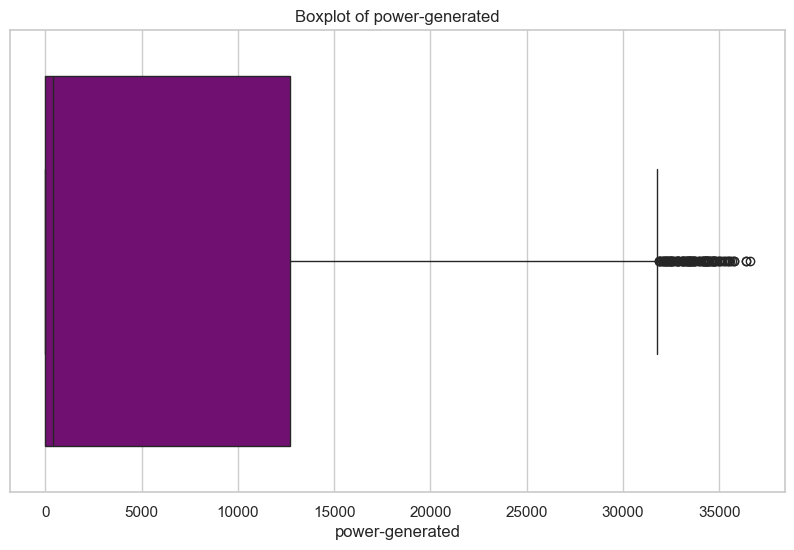

In [14]:
# 2️. Boxplots to check outliers
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(x=df[col], color='purple')
    plt.title(f"Boxplot of {col}")
    plt.show()

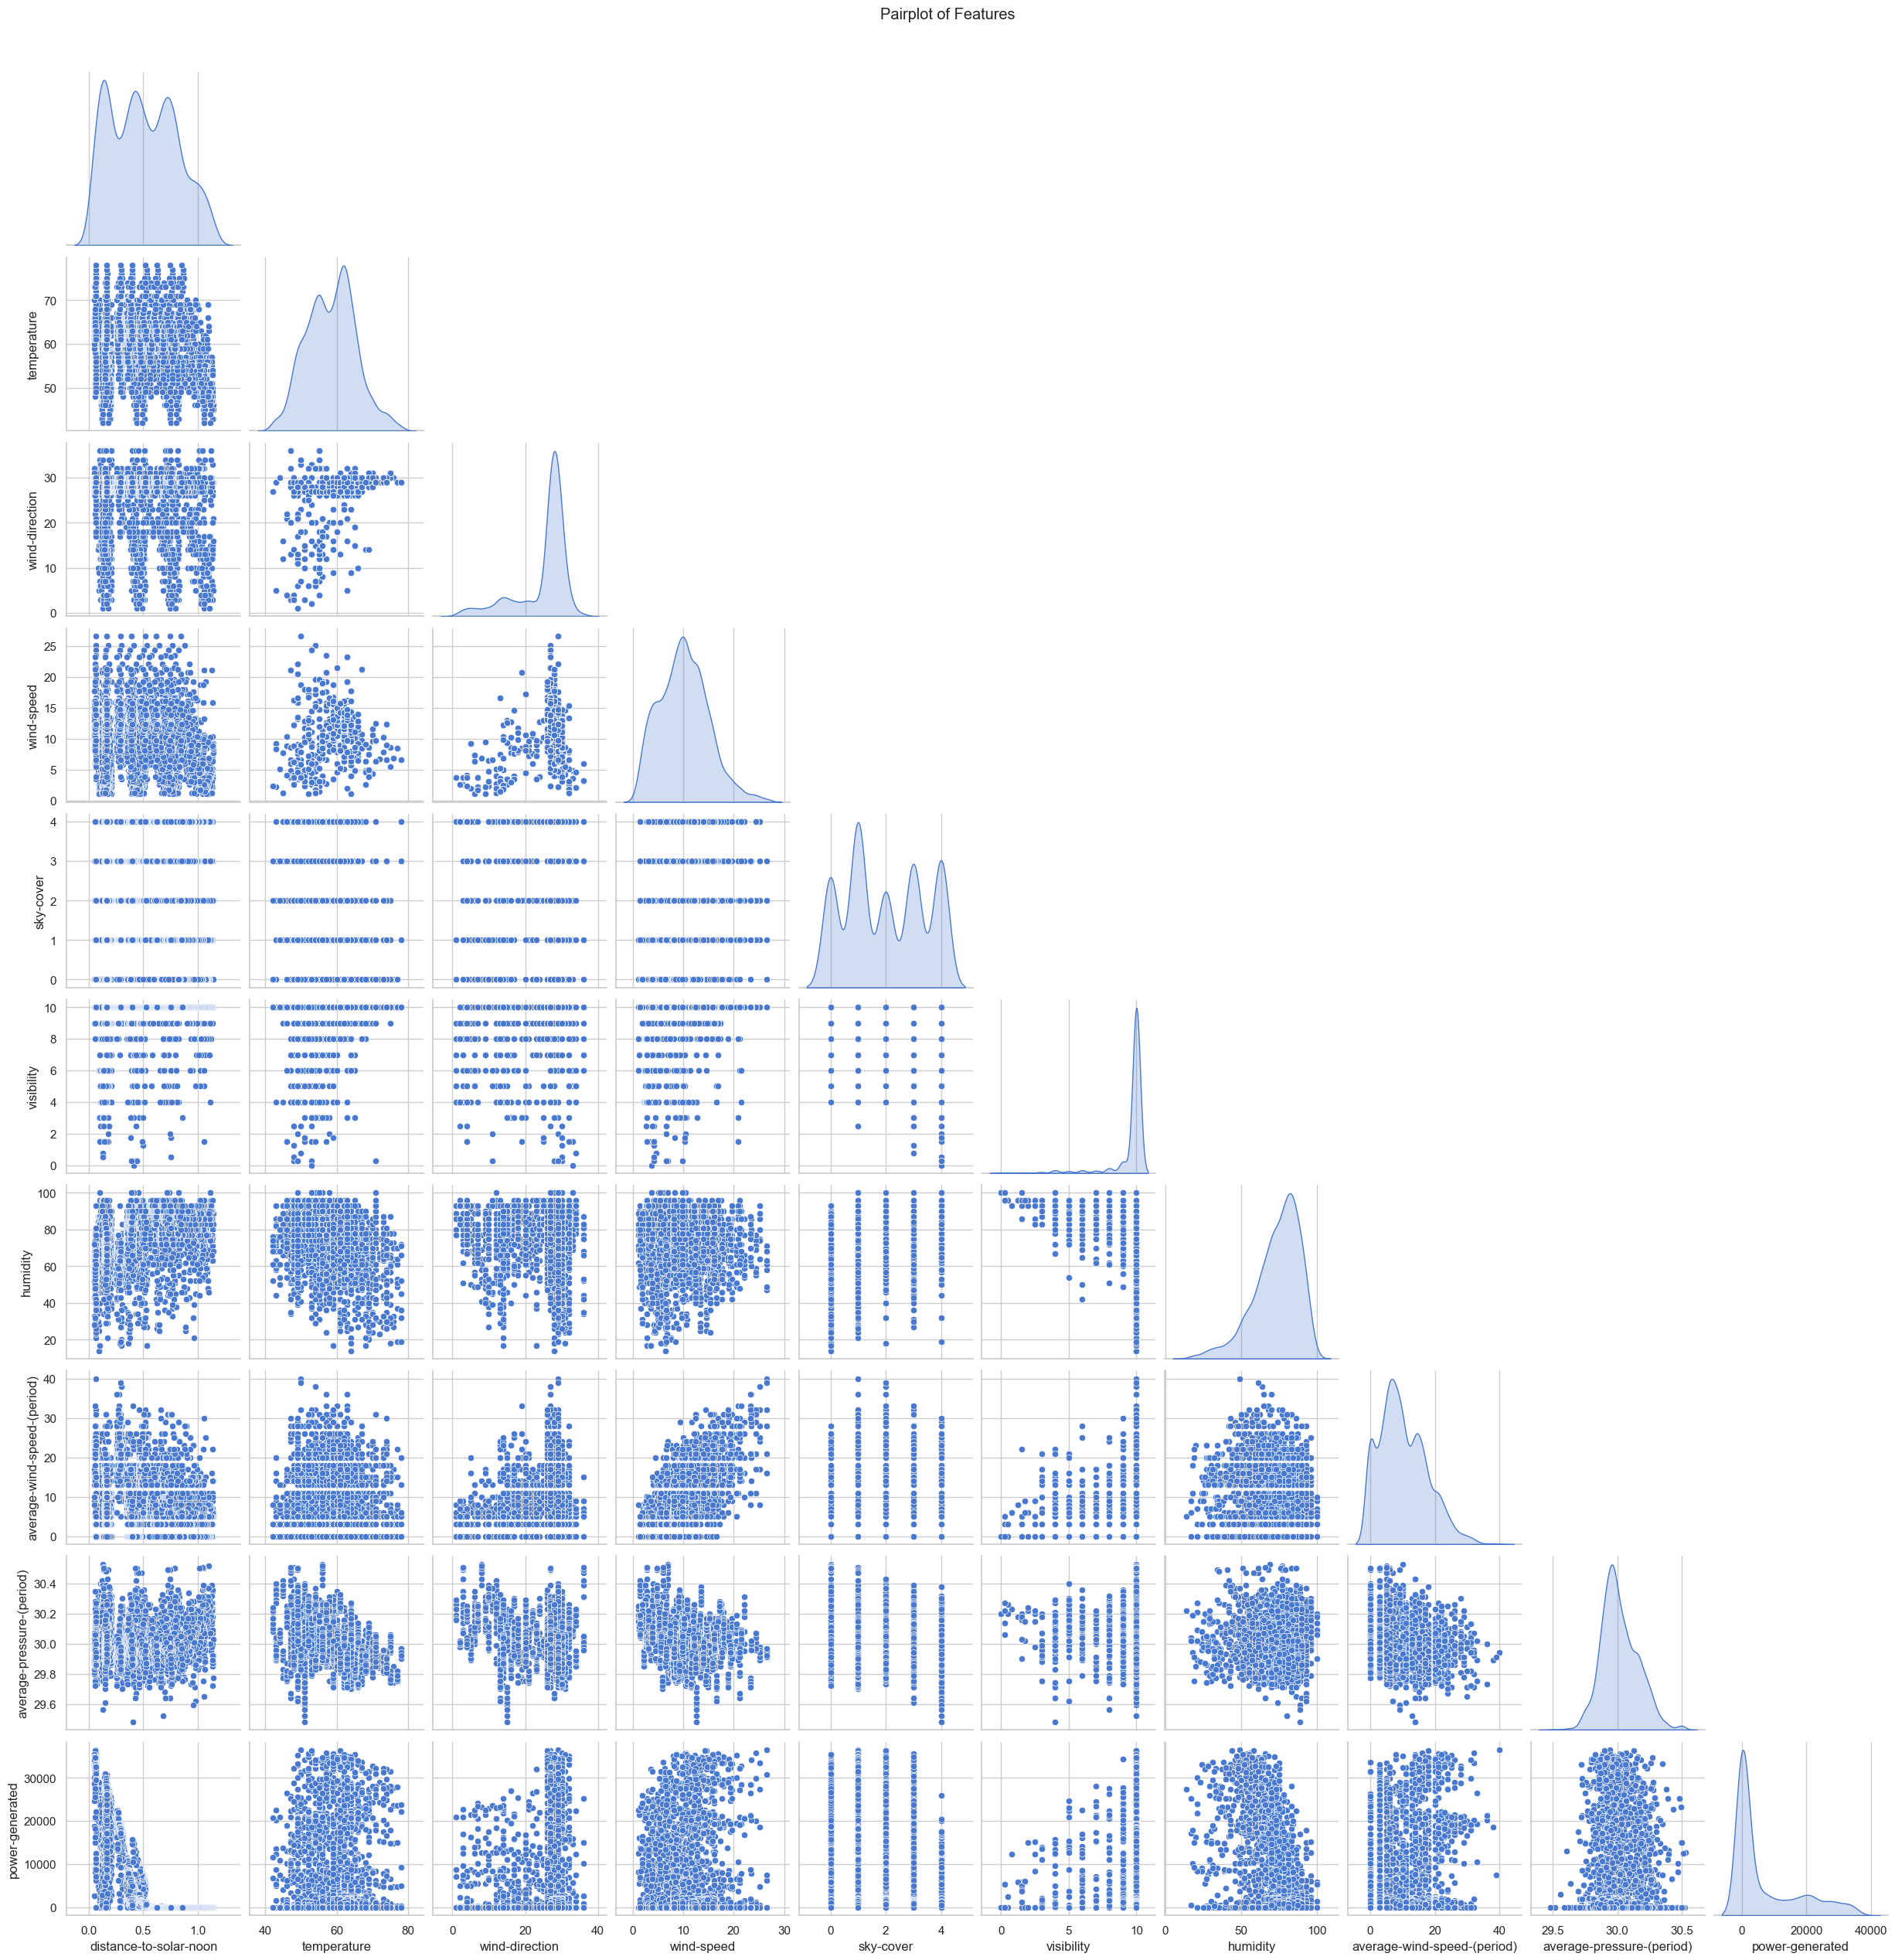

In [15]:
# 3️. Pairplot to see relationships
sns.pairplot(df, diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

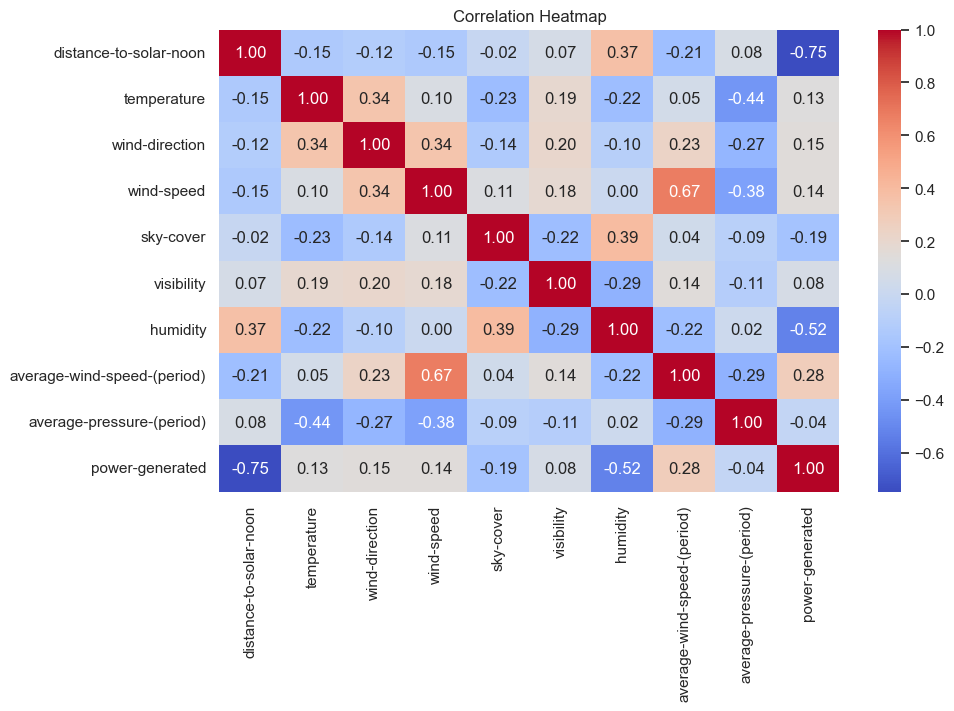

In [16]:
# 4️. Heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

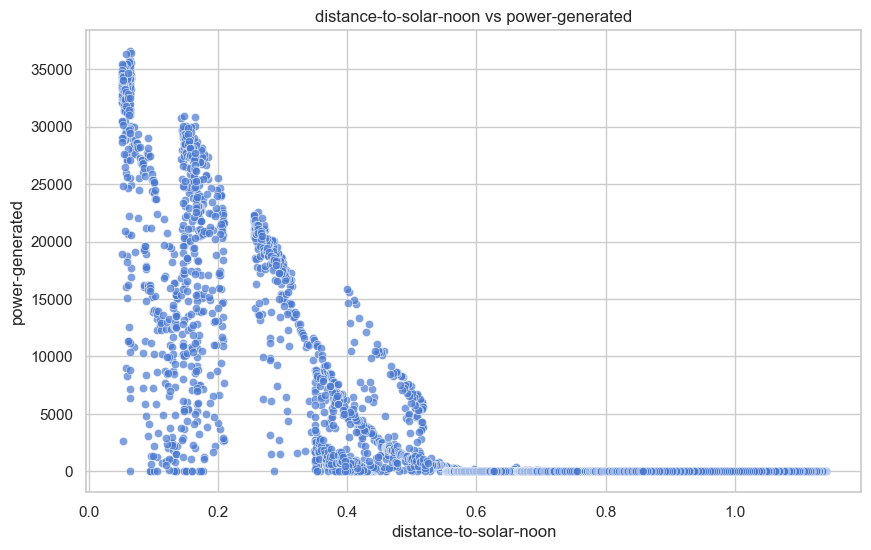

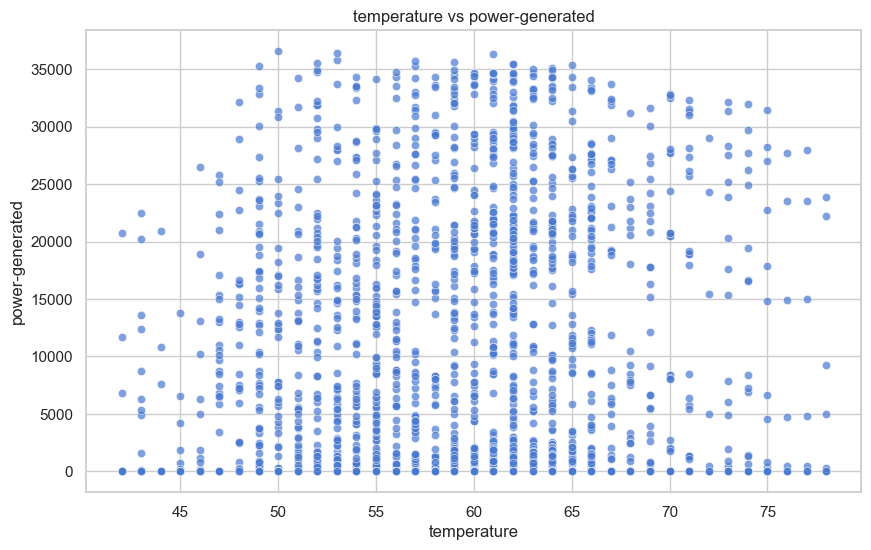

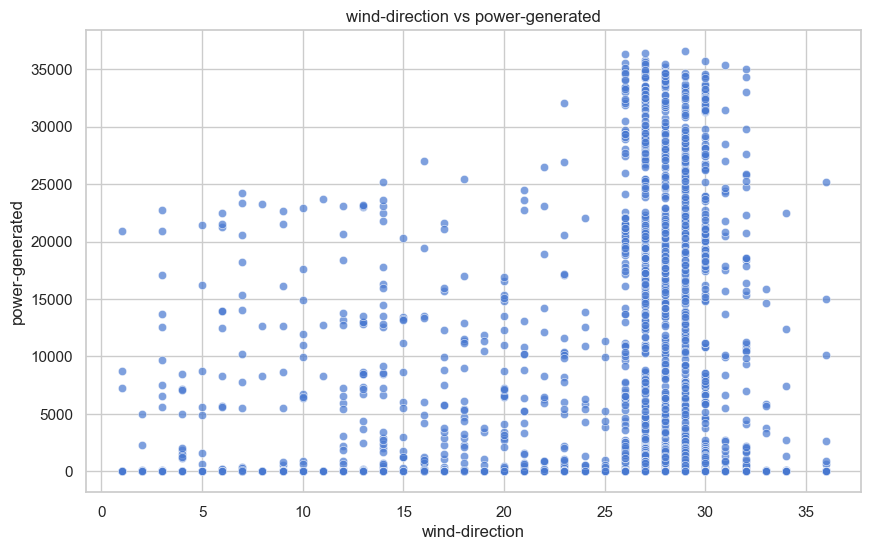

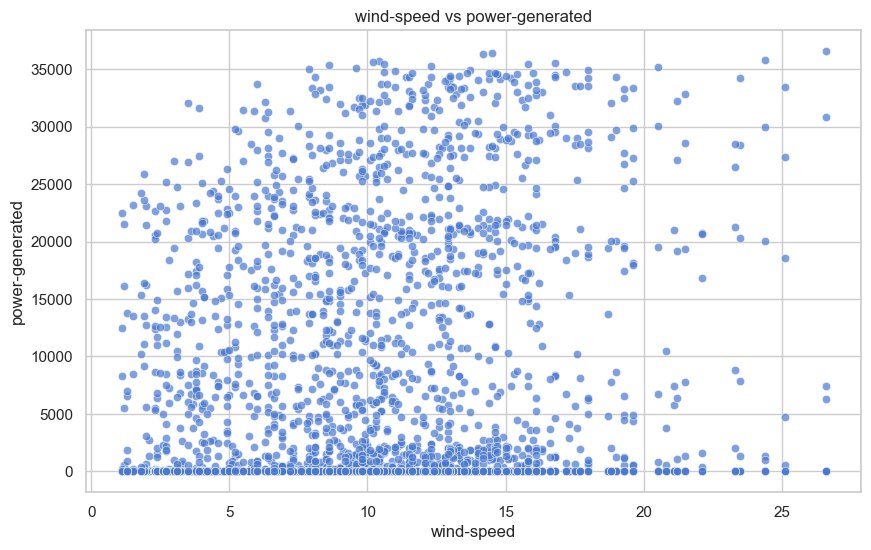

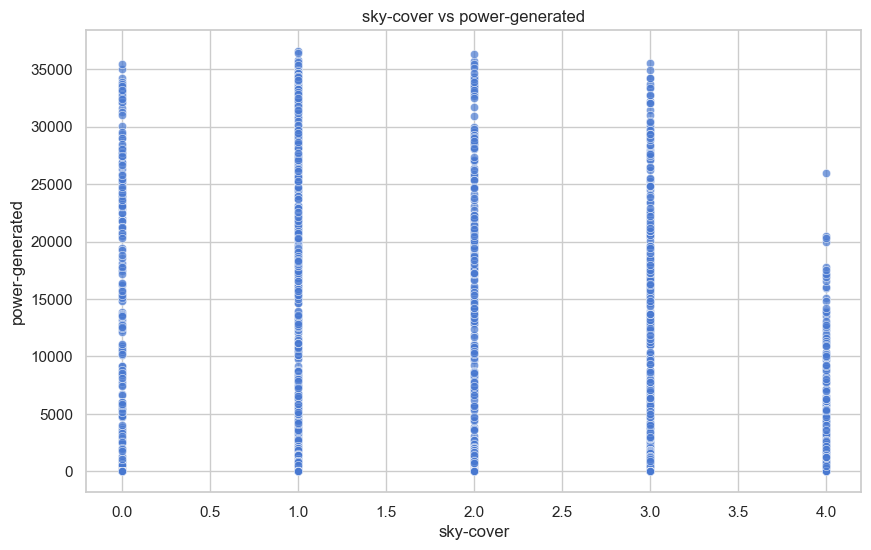

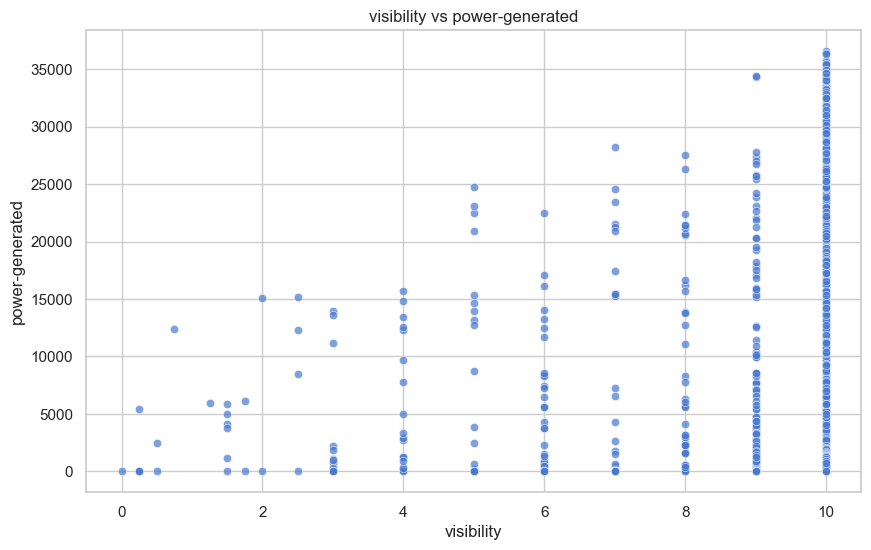

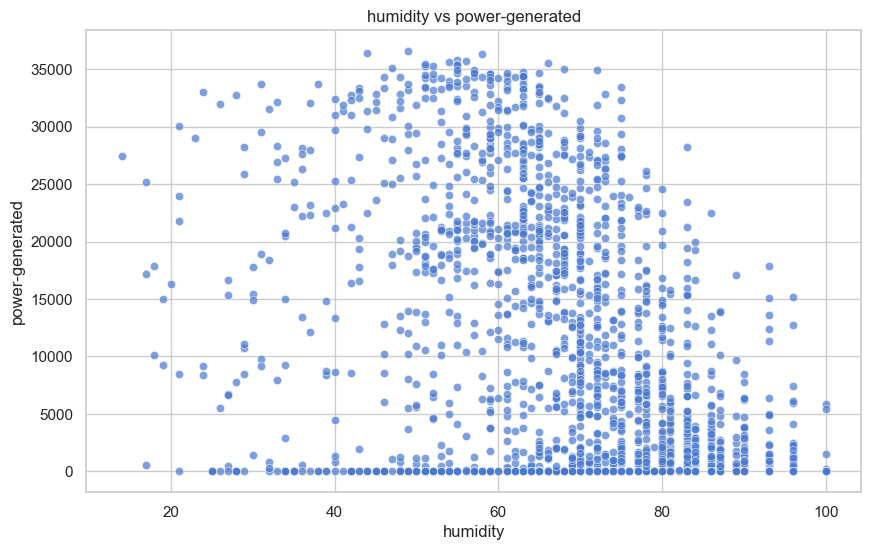

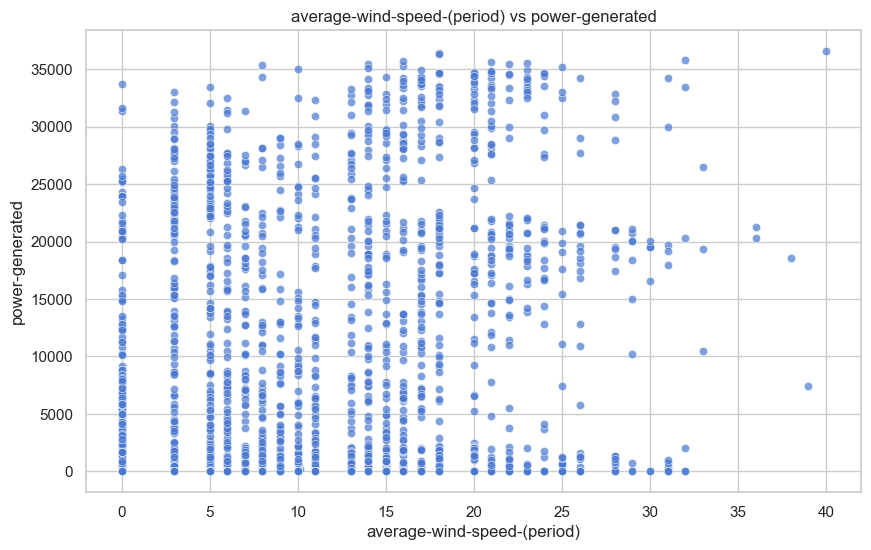

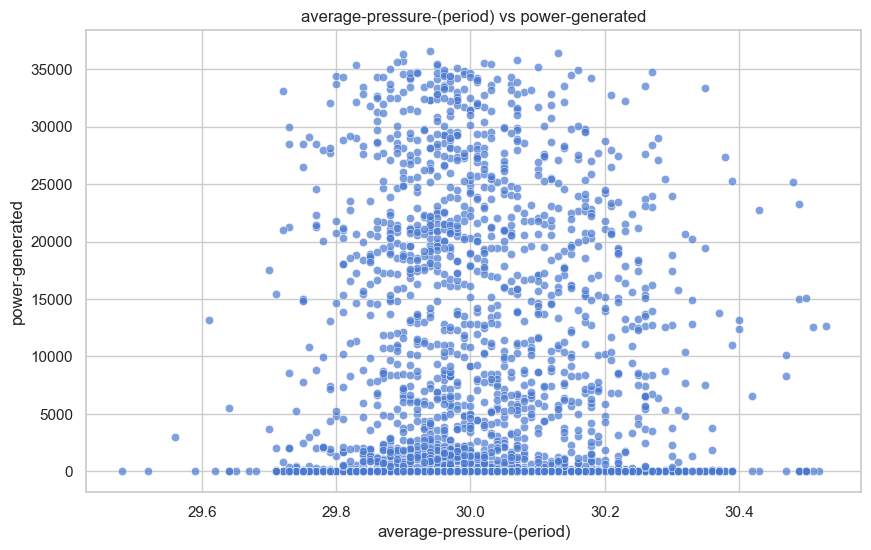

In [17]:
# 5️. Scatter plots of each feature vs target
target_col = 'power-generated'  # change to your actual target column
for col in df.select_dtypes(include='number').columns:
    if col != target_col:
        sns.scatterplot(x=df[col], y=df[target_col], alpha=0.7)
        plt.title(f"{col} vs {target_col}")
        plt.show()

C:\Users\Dhanush L\AppData\Local\Temp\ipykernel_18488\892138776.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='purple')


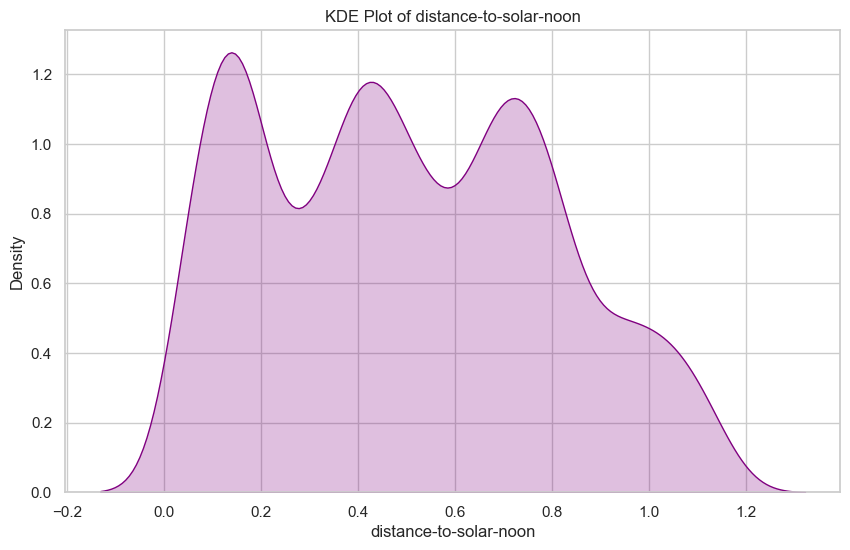

C:\Users\Dhanush L\AppData\Local\Temp\ipykernel_18488\892138776.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='purple')


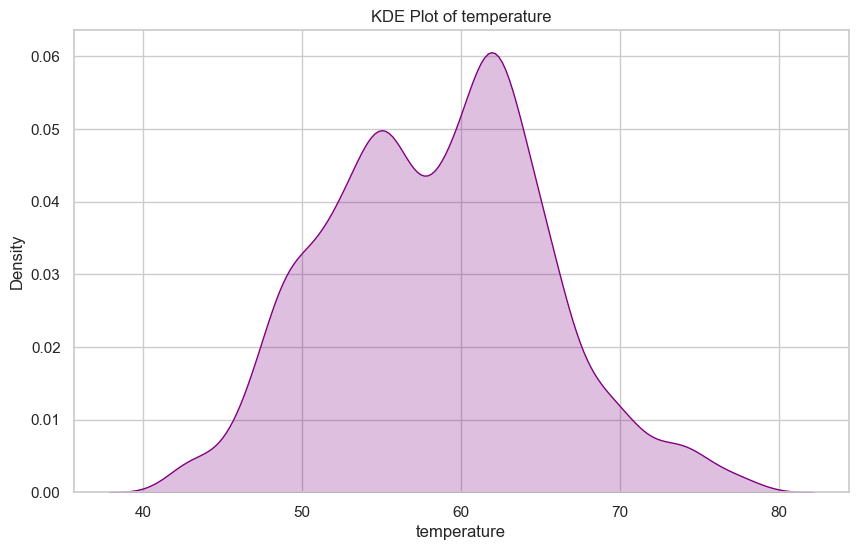

C:\Users\Dhanush L\AppData\Local\Temp\ipykernel_18488\892138776.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='purple')


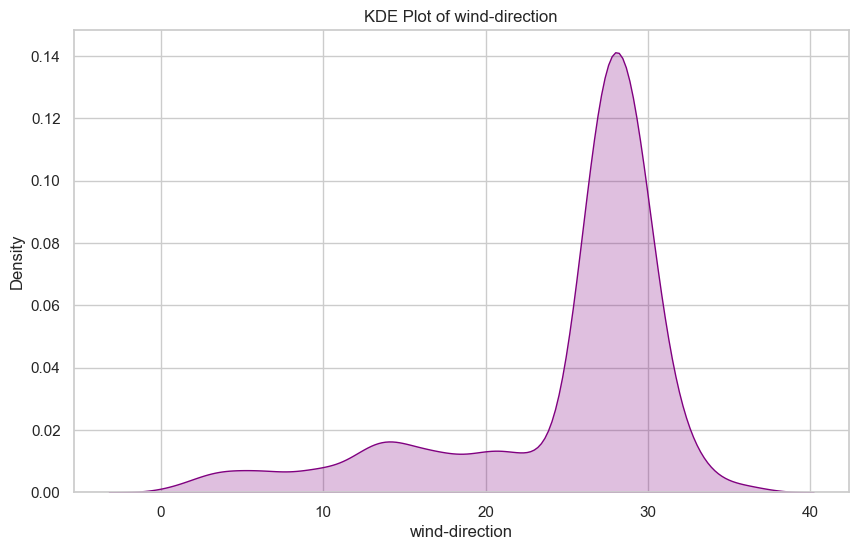

C:\Users\Dhanush L\AppData\Local\Temp\ipykernel_18488\892138776.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='purple')


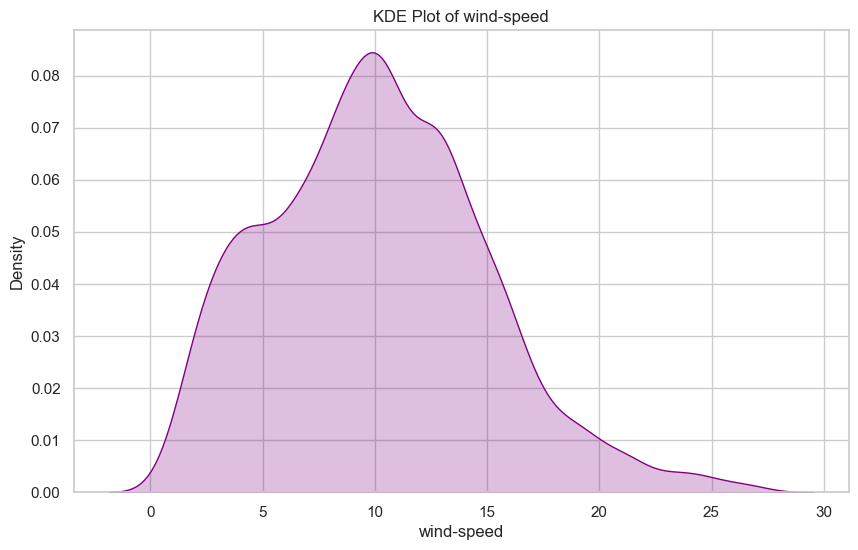

C:\Users\Dhanush L\AppData\Local\Temp\ipykernel_18488\892138776.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='purple')


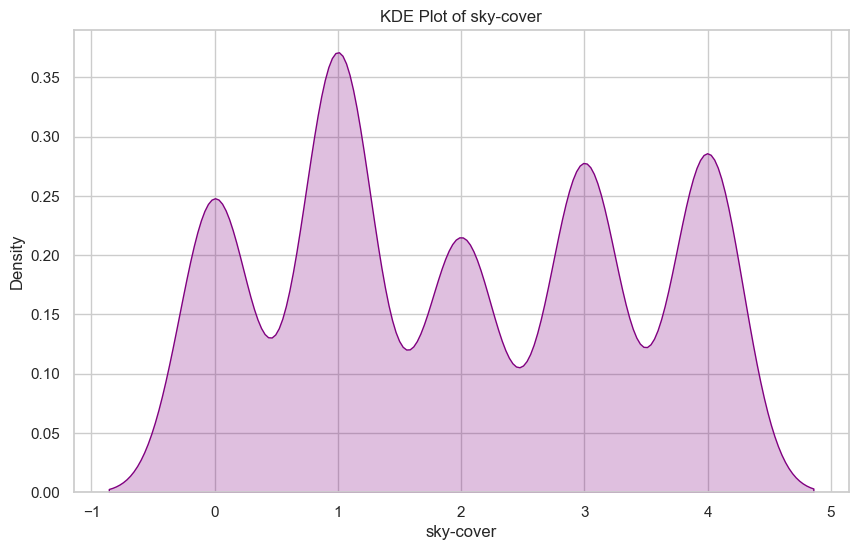

C:\Users\Dhanush L\AppData\Local\Temp\ipykernel_18488\892138776.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='purple')


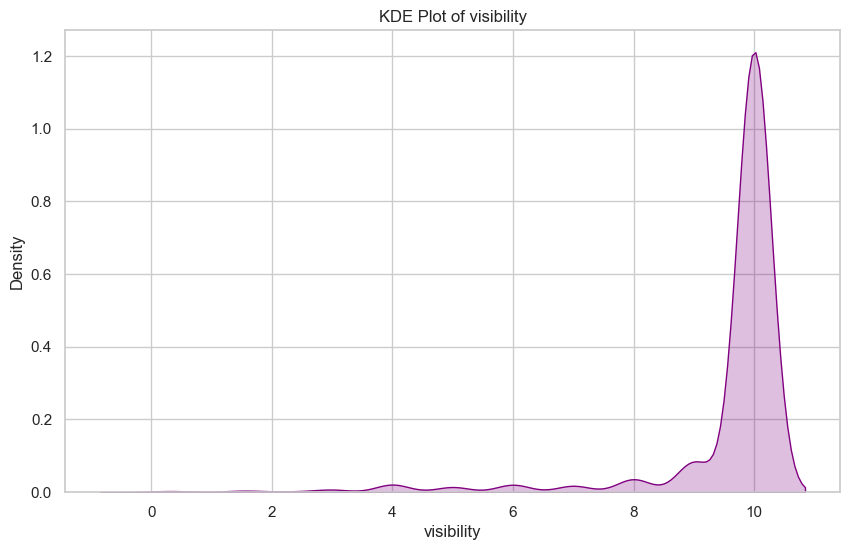

C:\Users\Dhanush L\AppData\Local\Temp\ipykernel_18488\892138776.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='purple')


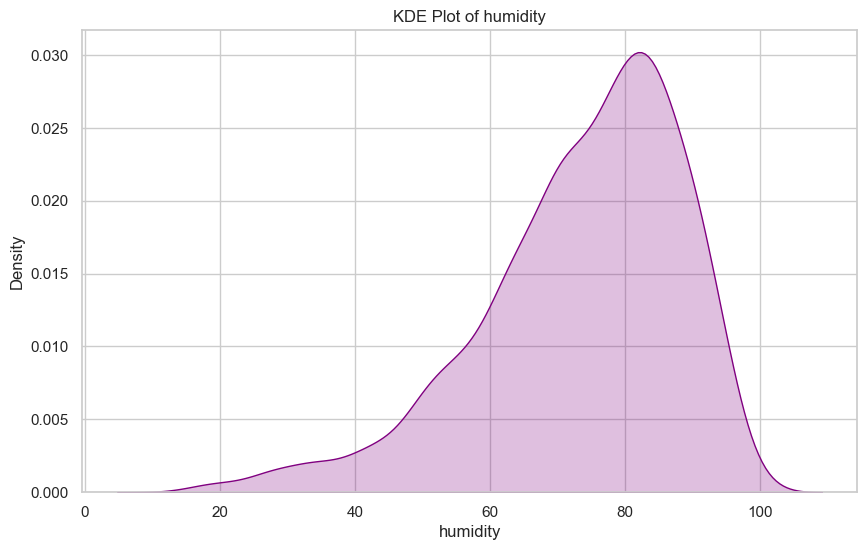

C:\Users\Dhanush L\AppData\Local\Temp\ipykernel_18488\892138776.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='purple')


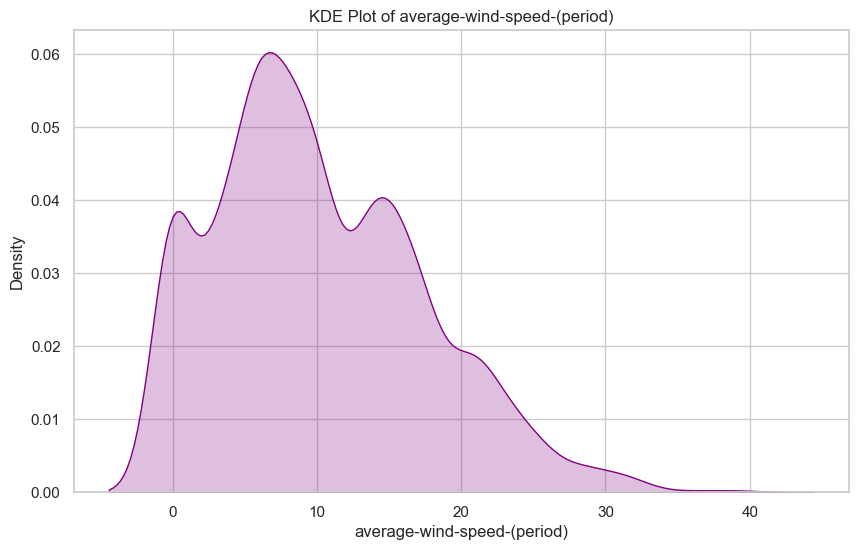

C:\Users\Dhanush L\AppData\Local\Temp\ipykernel_18488\892138776.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='purple')


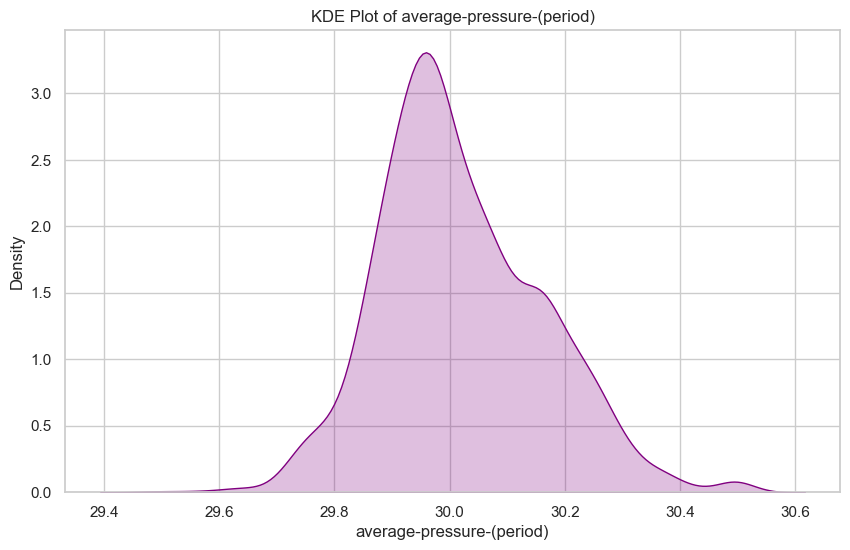

C:\Users\Dhanush L\AppData\Local\Temp\ipykernel_18488\892138776.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='purple')


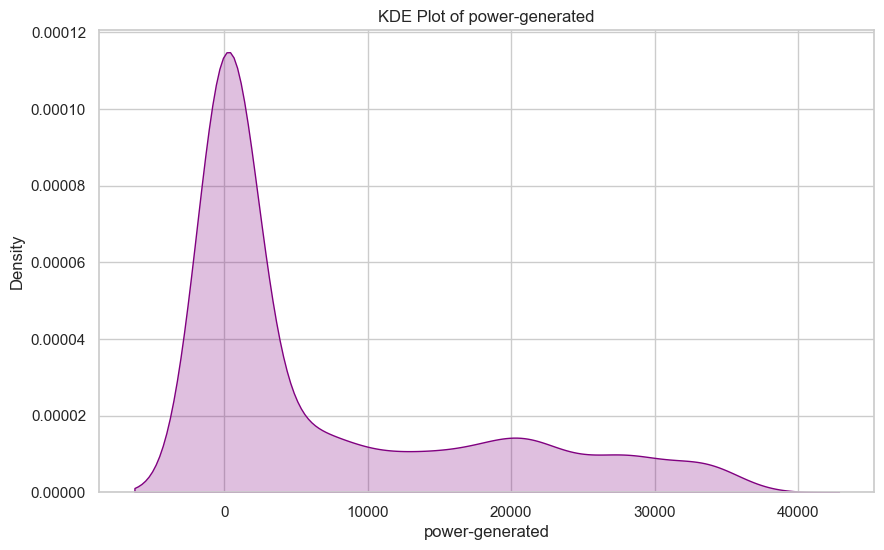

In [18]:
# 6️. KDE plots for distribution shape
for col in df.select_dtypes(include='number').columns:
    sns.kdeplot(df[col], shade=True, color='purple')
    plt.title(f"KDE Plot of {col}")
    plt.show()

In [19]:
z=df.corr()
z

distance-to-solar-noon  temperature  \
distance-to-solar-noon                     1.000000    -0.145207   
temperature                               -0.145207     1.000000   
wind-direction                            -0.118010     0.342146   
wind-speed                                -0.145073     0.096267   
sky-cover                                 -0.015184    -0.230672   
visibility                                 0.065807     0.194110   
humidity                                   0.368964    -0.221463   
average-wind-speed-(period)               -0.214887     0.054545   
average-pressure-(period)                  0.082505    -0.435723   
power-generated                           -0.746681     0.132193   

                             wind-direction  wind-speed  sky-cover  \
distance-to-solar-noon            -0.118010   -0.145073  -0.015184   
temperature                        0.342146    0.096267  -0.230672   
wind-direction                     1.000000    0.341529  -0.137140   
wind-speed                         0.341529    1.000000   0.107793   
sky-cover                         -0.137140    0.107793   1.000000   
visibility                         0.203445    0.184778  -0.223523   
humidity                          -0.095917    0.004901   0.394576   
average-wind-speed-(period)        0.229706    0.673364   0.044301   
average-pressure-(period)         -0.272405   -0.379752  -0.091512   
power-generated                    0.146788    0.142641  -0.187236   

                             visibility  humidity  \
distance-to-solar-noon         0.065807  0.368964   
temperature                    0.194110 -0.221463   
wind-direction                 0.203445 -0.095917   
wind-speed                     0.184778  0.004901   
sky-cover                     -0.223523  0.394576   
visibility                     1.000000 -0.291320   
humidity                      -0.291320  1.000000   
average-wind-speed-(period)    0.143224 -0.217959   
average-pressure-(period)     -0.105345  0.018489   
power-generated                0.076536 -0.522545   

                             average-wind-speed-(period)  \
distance-to-solar-noon                         -0.214887   
temperature                                     0.054545   
wind-direction                                  0.229706   
wind-speed                                      0.673364   
sky-cover                                       0.044301   
visibility                                      0.143224   
humidity                                       -0.217959   
average-wind-speed-(period)                     1.000000   
average-pressure-(period)                      -0.293406   
power-generated                                 0.278154   

                             average-pressure-(period)  power-generated  
distance-to-solar-noon                        0.082505        -0.746681  
temperature                                  -0.435723         0.132193  
wind-direction                               -0.272405         0.146788  
wind-speed                                   -0.379752         0.142641  
sky-cover                                    -0.091512        -0.187236  
visibility                                   -0.105345         0.076536  
humidity                                      0.018489        -0.522545  
average-wind-speed-(period)                  -0.293406         0.278154  
average-pressure-(period)                     1.000000        -0.036771  
power-generated                              -0.036771         1.000000

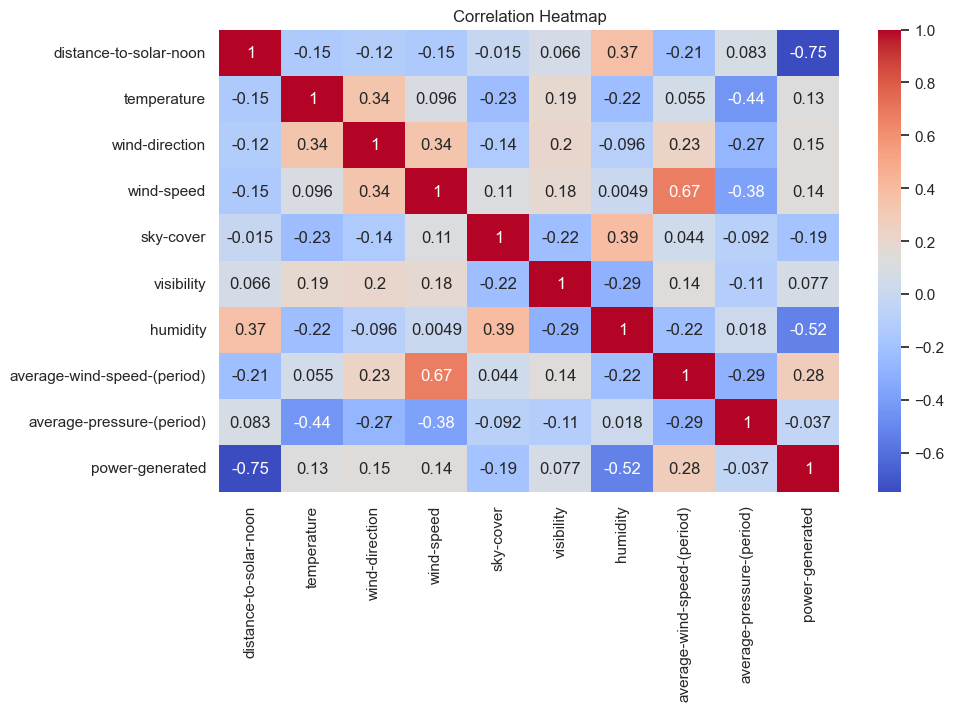

In [20]:
plt.figure(figsize=(10,6))
# passing the z value in it so we can visualize their correlation between them
sns.heatmap(z, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

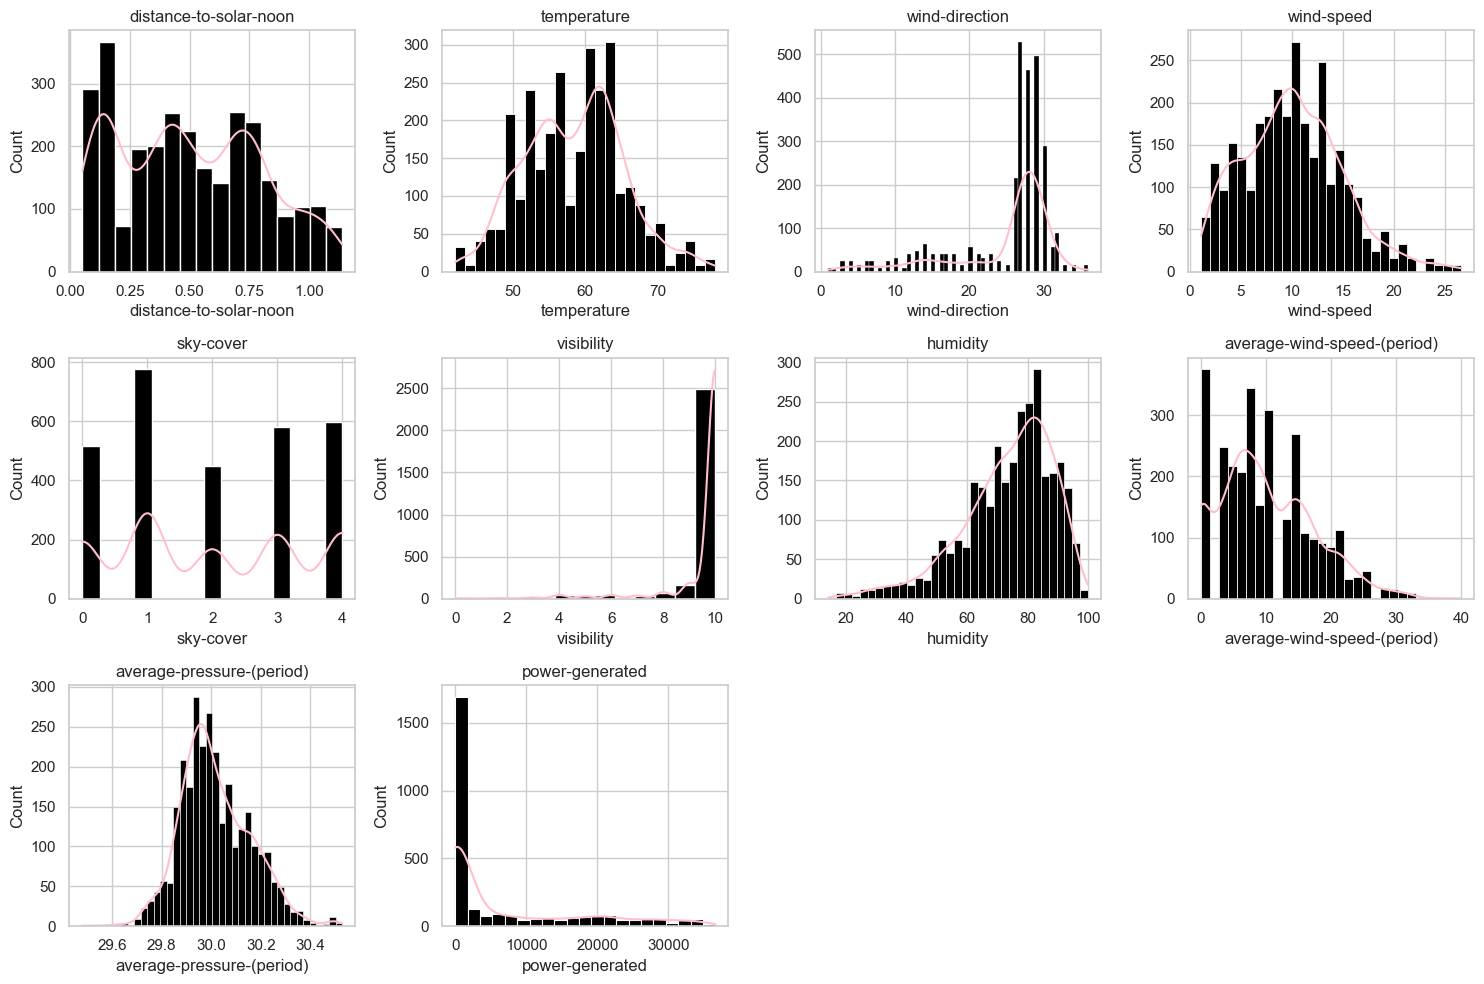

In [21]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True,color='pink',facecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()

In [22]:
# saving the file
df.to_csv("solarpowergeneration_cleaned.csv", index=False)
df

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0        75                          8.0   
1             0        10.0        77                          5.0   
2             0        10.0        70                          0.0   
3             0        10.0        33                          0.0   
4             0        10.0        21                          3.0   
...         ...         ...       ...                          ...   
2915          4        10.0        75                         10.0   
2916          1        10.0        66                         15.0   
2917          2        10.0        68                         21.0   
2918          2        10.0        81                         17.0   
2919          1        10.0        81                         11.0   

      average-pressure-(period)  power-generated  
0                         29.82                0  
1                         29.85                0  
2                         29.89             5418  
3                         29.91            25477  
4                         29.89            30069  
...                         ...              ...  
2915                      29.93             6995  
2916                      29.91            29490  
2917                      29.88            17257  
2918                      29.87              677  
2919                      29.90                0  

[2920 rows x 10 columns]

# Step 5:Detection of outliers 

In [23]:
# Detect Outliers  
def detect_outliers_iqr(data):
    outlier_indices = {}
    for col in data.select_dtypes(include='number').columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_indices[col] = outliers

        print(f"{col}: {len(outliers)} outliers")
    
    return outlier_indices


all_outliers = detect_outliers_iqr(df)

distance-to-solar-noon: 0 outliers
temperature: 0 outliers
wind-direction: 528 outliers
wind-speed: 40 outliers
sky-cover: 0 outliers
visibility: 429 outliers
humidity: 83 outliers
average-wind-speed-(period): 25 outliers
average-pressure-(period): 31 outliers
power-generated: 107 outliers


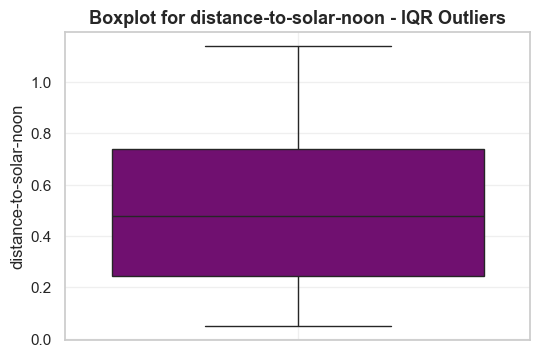

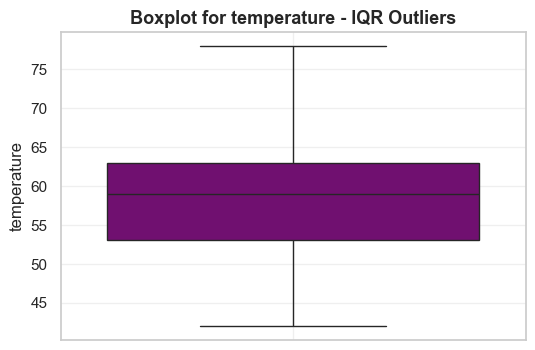

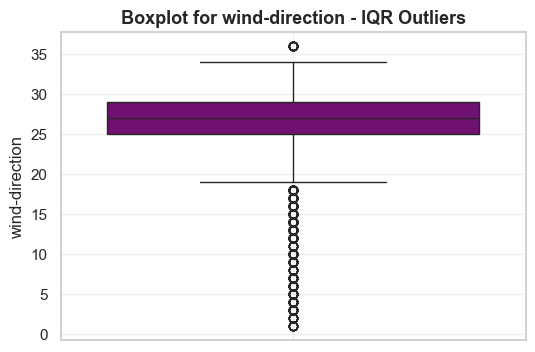

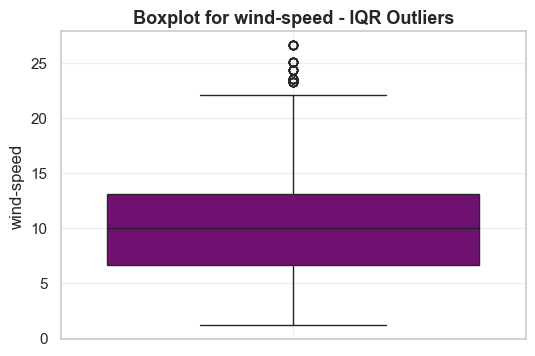

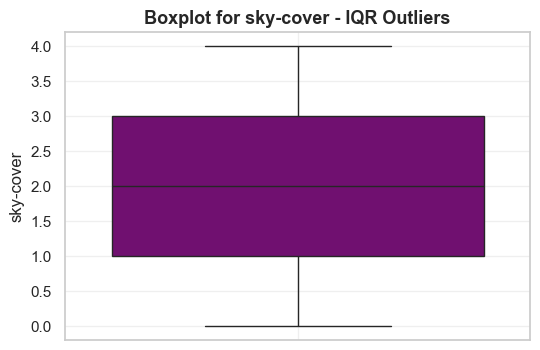

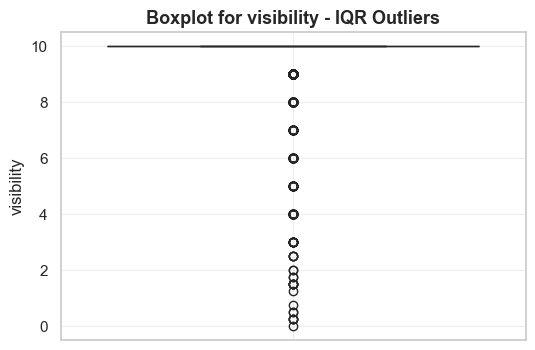

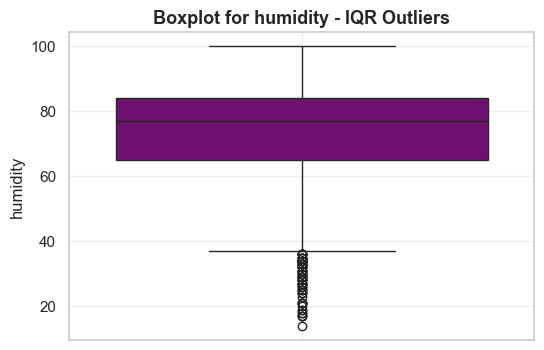

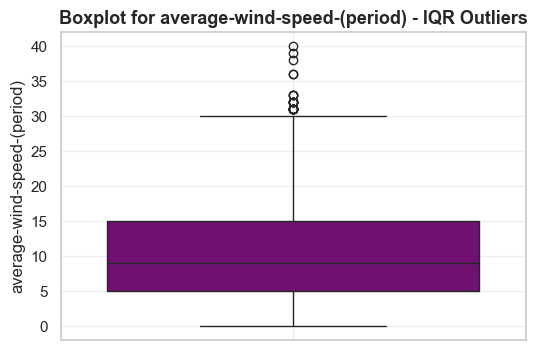

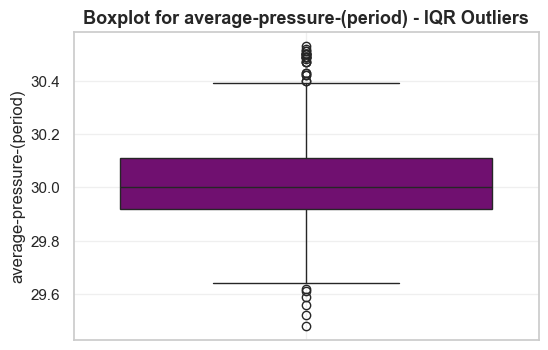

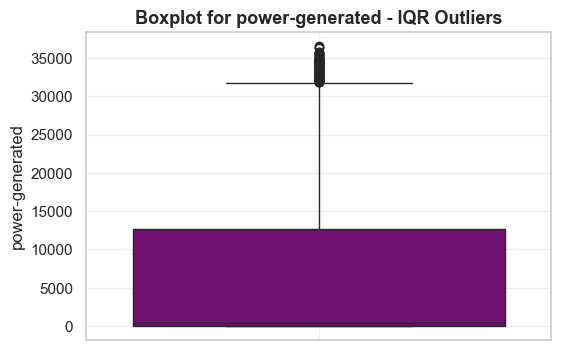

In [24]:
# Visualize Outliers 
def visualize_outliers(data):
    for col in data.select_dtypes(include='number').columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=data[col], color="purple")
        plt.title(f"Boxplot for {col} - IQR Outliers", fontsize=13, fontweight="bold")
        plt.grid(True, alpha=0.3)
        plt.show()
        
visualize_outliers(df)


# Step 6:Removal of outliers

In [25]:
def remove_outliers_iqr(data):
    df_clean = data.copy()
    for col in df_clean.select_dtypes(include='number').columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df_no_outliers = remove_outliers_iqr(df)

print(f"Original rows: {len(df)}")
print(f"After removing outliers: {len(df_no_outliers)}")

     

Original rows: 2920
After removing outliers: 2001


## Define Features and Target variable

In [26]:
x=df.drop("power-generated", axis=1)
y=df["power-generated"]

## Split the data for Training and Testing

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

## Standardizing the features

In [28]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

## Model Building

## 1. Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
lr_model= LinearRegression()
lr_model.fit(x_train_scaled, y_train)

LinearRegression()

In [31]:
y_pred_lr= lr_model.predict(x_test_scaled)

In [32]:
print("Linear Regression:")
print("MAE:",mean_absolute_error(y_test,y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("R2 Score:", r2_score(y_test,y_pred_lr))

Linear Regression:
MAE: 4981.201479686538
RMSE: 6284.518798127553
R2 Score: 0.6250592396092091


In [33]:
lr1_model= LinearRegression()
lr1_model.fit(x_train, y_train)

LinearRegression()

In [34]:
y_pred_lr1= lr1_model.predict(x_test)

In [35]:
print("Linear Regression:")
print("MAE:",mean_absolute_error(y_test,y_pred_lr1))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred_lr1)))
print("R2 Score:", r2_score(y_test,y_pred_lr1))

Linear Regression:
MAE: 4981.201479686537
RMSE: 6284.51879812755
R2 Score: 0.6250592396092093


## 2. Support Vector Regressor

In [36]:
from sklearn.svm import SVR

In [37]:
svr_model= SVR(kernel="rbf", C= 100, gamma= 0.1, epsilon= 0.1)
svr_model.fit(x_train_scaled, y_train)

SVR(C=100, gamma=0.1)

In [38]:
y_pred_svr= svr_model.predict(x_test_scaled)

In [39]:
print("Support Vector Regressor:")
print("MAE:",mean_absolute_error(y_test,y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred_svr)))
print("R2 Score:", r2_score(y_test,y_pred_svr))

Support Vector Regressor:
MAE: 4477.505209829118
RMSE: 7212.141774956613
R2 Score: 0.5062045232587504


## 3. Ridge Regressor

In [40]:
from sklearn.linear_model import Ridge
ridge_model= Ridge(alpha=1.0)
ridge_model.fit(x_train_scaled, y_train)

Ridge()

In [41]:
y_pred_ridge= ridge_model.predict(x_test_scaled)


In [42]:
print("Ridge Regressor:")
print("MAE:",mean_absolute_error(y_test,y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred_ridge)))
print("R2 Score:", r2_score(y_test,y_pred_ridge))

Ridge Regressor:
MAE: 4980.973325453739
RMSE: 6284.544258720479
R2 Score: 0.6250562015935022


## 4. Lasso Regressor

In [43]:
from sklearn.linear_model import Lasso
lasso_model= Lasso(alpha=0.001)
lasso_model.fit(x_train_scaled, y_train)

Lasso(alpha=0.001)

In [44]:
y_pred_lasso= lasso_model.predict(x_test_scaled)


In [45]:
print("Lasso Regressor:")
print("MAE:",mean_absolute_error(y_test,y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred_lasso)))
print("R2 Score:", r2_score(y_test,y_pred_lasso))

Lasso Regressor:
MAE: 4981.201574045596
RMSE: 6284.518757499015
R2 Score: 0.6250592444570884


## 5. Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf_model= RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [47]:
y_pred_rf= rf_model.predict(x_test)

In [48]:
print("Random Forest Regressor:")
print("MAE:",mean_absolute_error(y_test,y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("R2 Score:", r2_score(y_test,y_pred_rf))

Random Forest Regressor:
MAE: 1546.9124143835616
RMSE: 3387.730268164666
R2 Score: 0.8910477394656026


In [49]:
results= []
results.append(["Linear Regression", r2_score(y_test, y_pred_lr)])
results.append(["Ridge Regression", r2_score(y_test, y_pred_ridge)])
results.append(["Lasso Regression", r2_score(y_test, y_pred_lasso)])
results.append(["SVR", r2_score(y_test, y_pred_svr)])
results.append(["Random Forest", r2_score(y_test, y_pred_rf)])

In [50]:
results

[['Linear Regression', 0.6250592396092091],
 ['Ridge Regression', 0.6250562015935022],
 ['Lasso Regression', 0.6250592444570884],
 ['SVR', 0.5062045232587504],
 ['Random Forest', 0.8910477394656026]]

In [51]:
df_results= pd.DataFrame(results, columns=["Model Name","R2 Score"])

In [52]:
df_results

Model Name  R2 Score
0  Linear Regression  0.625059
1   Ridge Regression  0.625056
2   Lasso Regression  0.625059
3                SVR  0.506205
4      Random Forest  0.891048

In [53]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Model Comparison With R2 Scores')

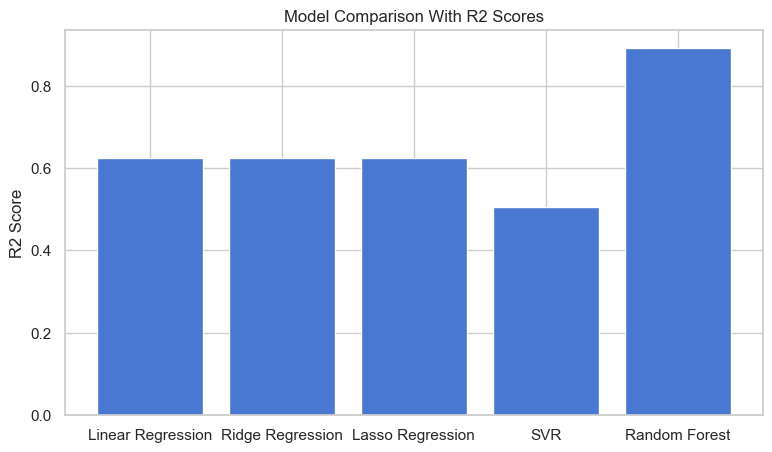

In [54]:
plt.figure(figsize=(9,5))
plt.bar(df_results["Model Name"], df_results["R2 Score"])
plt.ylabel("R2 Score")
plt.title("Model Comparison With R2 Scores")

In [58]:
import joblib

joblib.dump(scaler, "scaler.pkl")
joblib.dump(rf_model, open("solar_model.pkl", "wb"))